# Chapter One. Introduction and preparing your data
In this chapter, you''ll learn about the typical challenges associated with fraud detection, and will learn how to resample your data in a smart way, to tackle problems with imbalanced data.

> **Topics:**
- 1. Introduction to fraud detection
    - 1.1 Checking the fraud to non-fraud ratio
    - 1.2 Plotting your data
- 2. Data resampling
    - 2.1. Resampling methods for imbalanced data
    - 2.2. Applying SMOTE
    - 2.3. Compare SMOTE to original data
- 3. Fraud detection algorithms in action
    - 3.1. Exploring the traditional way to catch fraud
    - 3.2. Using ML classification to catch fraud
    - 3.3. Logistic regression combined with SMOTE
    - 3.4. Using a pipeline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filepath = '../_datasets/chapter_1/'

sns.set()

## 1. Introduction to fraud detection

### What is Fraud?
**Examples of fraud:** insurance fraud, credit card fraud, identify theft, money laundering, tax evasion, product warranty, healthcare fraud 
Fraud is
- uncommon
- concealed
- changing over time
- organized

### Fraud detection is challenging

- Unbalanced Classes
![][Fraud_detection]

[Fraud_detection]: _Docs/00-Fraud_detection.png


### How companies deal with fraud
Fraud analytics teams:
1. Often use rules based systems, based on manually set thresholds and experience
2. Check the news
3. Receive external lists of fraudulent accounts and names
4. Sometimes use machine learning algorithms to detect fraud or suspicious behaviour


### 1.1 Checking the fraud to non-fraud ratio
In this chapter, you will work on `creditcard_sampledata_3.csv`, a dataset containing credit card transactions data. Fraud occurrences are fortunately an extreme minority in these transactions.

However, **Machine Learning algorithms usually work best when the different classes contained in the dataset are more or less equally present**. If there are few cases of fraud, then there's little data to learn how to identify them. This is known as **class imbalance**, and it's one of the main challenges of fraud detection.

Let's explore this dataset, and observe this class imbalance problem.

In [2]:
# Import pandas and read csv
import pandas as pd
df = pd.read_csv(filepath+"creditcard_sampledata_3.csv")

df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,...,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
1,69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,...,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0
2,96552,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,...,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0
3,281898,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,...,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0
4,86917,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,...,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0


In [3]:
# Explore the features available in your dataframe
print(df.info())

# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ / df.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 31 columns):
Unnamed: 0    5050 non-null int64
V1            5050 non-null float64
V2            5050 non-null float64
V3            5050 non-null float64
V4            5050 non-null float64
V5            5050 non-null float64
V6            5050 non-null float64
V7            5050 non-null float64
V8            5050 non-null float64
V9            5050 non-null float64
V10           5050 non-null float64
V11           5050 non-null float64
V12           5050 non-null float64
V13           5050 non-null float64
V14           5050 non-null float64
V15           5050 non-null float64
V16           5050 non-null float64
V17           5050 non-null float64
V18           5050 non-null float64
V19           5050 non-null float64
V20           5050 non-null float64
V21           5050 non-null float64
V22           5050 non-null float64
V23           5050 non-null float64
V24           5050 non-null flo

As you can see, the **ratio of fraudulent transactions is very low**. This is a case of **class imbalance problem**.

### 1.2 Plotting your data
From the previous exercise we know that the ratio of fraud to non-fraud observations is very low. You can do something about that, for example by **re-sampling** our data, which is explained in the next video.

In this exercise, you'll look at the data and **visualize the fraud to non-fraud ratio**. It is always a good starting point in your fraud analysis, to look at your data first, before you make any changes to it.

Moreover, when talking to your colleagues, a picture often makes it very clear that we're dealing with heavily imbalanced data. Let's create a plot to visualize the ratio fraud to non-fraud data points on the dataset `df`.

The function `prep_data()` is already loaded in your workspace, as well as `matplotlib.pyplot` as `plt`.

In [4]:
# Define a function to select features array and label array
def prep_data(df, idx_column_start = 2, idx_column_end = 30, class_column_name = 'Class'):
    X = df.loc[:,df.columns[idx_column_start:idx_column_end]].values
    y = df.loc[:,class_column_name].values
    return X, y

# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()

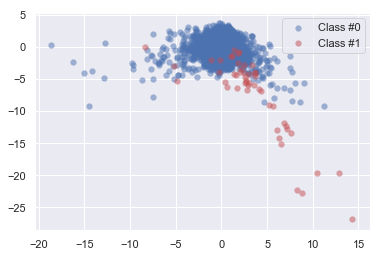

In [5]:
# Create X and y from the prep_data function 
X, y = prep_data(df)

# Plot our data by running our plot data function on X and y
plot_data(X, y)

By visualizing your data you can immediately see how our fraud cases are scattered over our data, and how few are cases we have. A picture often makes the imbalance problem often very clear.

## 2. Data resampling. Increasing succesfull detections using data resampling

### Random UnderSampling (RUS)
![][01_Undersampling]

### Random OverSampling (ROS)
![][02-Oversampling]

### Synthetic Minority Oversampling Technique (SMOTE)
![][03-SMOTE]

### Which resampling method to use?
- **Random Under Sampling (RUS)**: throw away data, computationally efficient
- **Random Over Sampling (ROS)**: straightforward and simple, but training your model on many duplicates
- **Synthetic Minority Oversampling Technique (SMOTE)**: more sophisticated and realistic dataset, but you are training on "fake" data

### When to use resampling methods
Use resampling methods on your training set, **never on your test set**!

 
``` Python
    # Define resampling method and split into train and test
    method = SMOTE(kind='borderline1')
    X_train, X_test, y_train, y_test = train_test_split(X, y,
    train_size=0.8, random_state=0)
    
    # Apply resampling to the training data only
    X_resampled, y_resampled = method.fit_sample(X_train, y_train)
    
    # Continue fitting the model and obtain predictions
    model = LogisticRegression()
    model.fit(X_resampled, y_resampled)
    
    # Get your performance metrics
    predicted = model.predict(X_test)
    print (classification_report(y_test, predicted))
```

Source: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanceddatasets

[01_Undersampling]:_Docs/01-Undersampling.png
[02-Oversampling]:_Docs/02-Oversampling.png
[03-SMOTE]:_Docs/03-SMOTE.png

### 2.1 Resampling methods for imbalanced data
Which of these methods takes a random subsample of your majority class to account for class "imbalancedness"?

**Answer the question**
- [ ] Random Over Sampling (ROS)
- [x] Random Under Sampling (RUS)
    > *By using ROS and SMOTE you add more examples to the minority class. RUS adjusts the balance of your data by **reducing** the majority class.*
- [ ] Synthetic Minority Over-sampling Technique (SMOTE)
- [ ] None of the above

### 2.2 Applying SMOTE
In this exercise, you're going to re-balance our data using the **Synthetic Minority Over-sampling Technique (SMOTE)**. Unlike ROS, SMOTE does not create exact copies of observations, but creates **new, synthetic, samples** that are quite similar to the existing observations in the minority class. SMOTE is therefore slightly more sophisticated than just copying observations, so let's apply SMOTE to our credit card data. The dataset `df` is available and the packages you need for SMOTE are imported. In the following exercise, you'll visualize the result and compare it to the original data, such that you can see the effect of applying SMOTE very clearly.

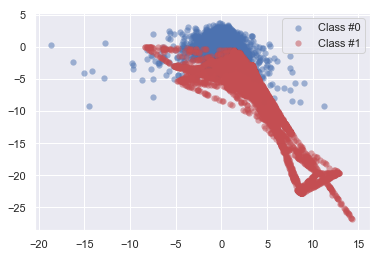

In [6]:
from imblearn.over_sampling import SMOTE

# Run the prep_data function
X, y = prep_data(df)

# Define the resampling method
method = SMOTE()

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)

# Plot the resampled data
plot_data(X_resampled, y_resampled)

### 2.3 Compare SMOTE to original data
In the last exercise, you saw that using SMOTE suddenly gives us more observations of the minority class. Let's compare those results to our original data, to get a good feeling for what has actually happened. Let's have a look at the value counts again of our old and new data, and let's plot the two scatter plots of the data side by side. You'll use the function `compare_plot()` for that that, which takes the following arguments: `X`, `y`, `X_resampled`, `y_resampled`, `method=''`. The function plots your original data in a scatter plot, along with the resampled side by side.

In [7]:
def compare_plot(X, y, X_resampled, y_resampled, method='SMOTE', figsize=(16,6)):

    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plot_data(X, y)
    plt.title('Original set')

    plt.subplot(1, 2, 2)
    plot_data(X_resampled, y_resampled)
    plt.title(method)

def compare_value_counts(y, y_resampled, figsize=(15,6)):
    # Comparing value counts of each class
    y_pos = [0,1]
    heights_imbalanced = pd.value_counts(pd.Series(y))
    heights_balanced = pd.value_counts(pd.Series(y_resampled))

    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plt.bar(y_pos, heights_imbalanced, align='center', alpha=0.7, color=['blue','red'])
    plt.xticks(y_pos, ('Class #0', 'Class #1'))
    plt.ylabel('Counts of class')
    plt.title('Original Set. Imbalanced')

    plt.subplot(1, 2, 2)
    plt.bar(y_pos, heights_balanced, align='center', alpha=0.7, color=['blue','red'])
    plt.xticks(y_pos, ('Class #0', 'Class #1'))
    plt.title('Resampled Set. Balanced')

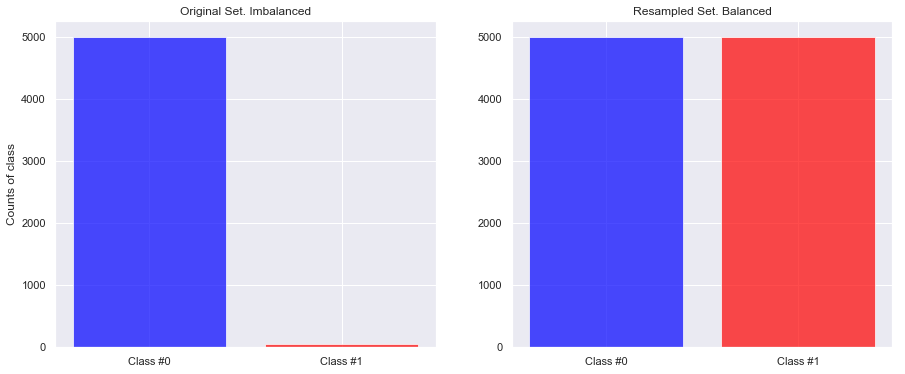

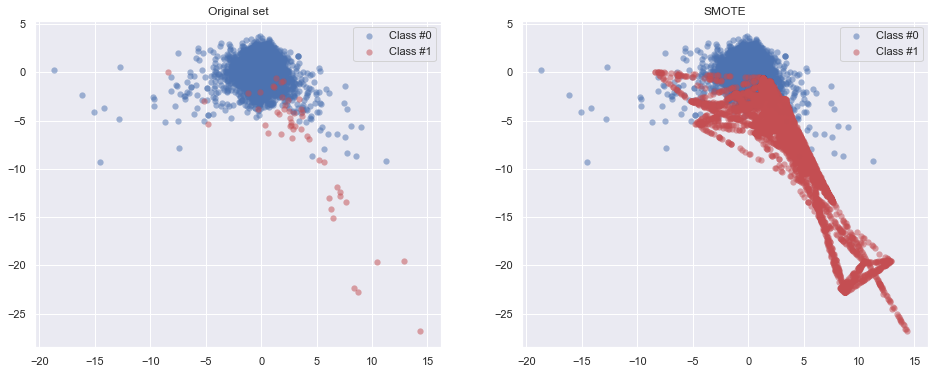

In [8]:
# Run compare_value_counts
compare_value_counts(y, y_resampled)
# Run compare_plot
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

It should by now be clear that our SMOTE has balanced our data completely, and that the minority class is now equal in size to the majority class. Visualizing the data shows the effect on your data very clearly. In the next exercise, we'll demonstrate that there are multiple ways to implement SMOTE and that each method will have a slightly different effect.

## 3.Fraud detection algorithms in action

### Traditional fraud detection with rules based systems
![][04-Rules_base_fraud_detection]

Rules based systems have their limitations:
1. Fixed thresholds per rule to determine fraud
2. Limited to yes/no outcomes.
3. Fail to capture interaction between features

### Why use machine learning for fraud detection?
1. Machine learning models adapt to the data, and thus can change over time
2. Uses all the data combined rather than a threshold per feature 
3. Can give a score, rather than a yes/no
4. Will typically have a better performance and can be combined with rules

### What you'll be doing in the upcoming chapters
- **Chapter 2. Supervised learning**: train a model using existing fraud labels
- **Chapter 3. Unsupervised learning**: use your data to determine what is *'suspicious'* behaviour without labels
- **Chapter 4. Fraud detection using text data**: Learn how to augment your fraud detection models with text mining and topic modelling

![][05-ML]

[04-Rules_base_fraud_detection]:_Docs/04-Rules_base_fraud_detection.png
[05-ML]:_Docs/05-ML.png

### 3.1 Exploring the traditional way to catch fraud
In this exercise you're going to try finding fraud cases in our credit card dataset the *"old way"*. First you'll define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on your features to detect fraud. This is common practice within fraud analytics teams.

Statistical thresholds are often determined by looking at the **mean** values of observations. Let's start this exercise by checking whether feature **means differ between fraud and non-fraud cases**. Then, you'll use that information to create common sense thresholds. Finally, you'll check how well this performs in fraud detection.

In [9]:
df = df[df.columns[1:]]
# Get the mean for each group
df.groupby('Class').mean()

# Implement a rule for stating which cases are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df.V1<-3,df.V3<-5), 1, 0)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,flag_as_fraud
0,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,0.215113,...,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0,0
1,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,0.444011,...,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0,0
2,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,-0.483771,...,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0,0
3,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,-0.801748,...,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0,0
4,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,0.022707,...,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0,0


In [10]:
# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              4984  16
1                28  22


with this rule, **we detect 22 out of 50 fraud cases**, but **can't detect the other 28**, and **get 16 false positives**. In the next exercise, we'll see how this measures up to a machine learning model.

### 3.2 Using ML classification to catch fraud
In this exercise you'll see what happens when you use a simple machine learning model on our credit card data instead.

Do you think you can beat those results? Remember, you've predicted **5 out of 11 fraud cases**, and had **16 false positives**. That's less than half of the cases caught, Also false positives were roughly 3 times the actual amount of fraud cases.

So with that in mind, let's implement a **Logistic Regression** model. If you have taken the class on supervised learning in Python, you should be familiar with this model. If not, you might want to refresh that at this point. But don't worry, you'll be guided through the structure of the machine learning model.

The `X` and `y` variables are available in your workspace.

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1505
           1       0.89      0.80      0.84        10

   micro avg       1.00      1.00      1.00      1515
   macro avg       0.94      0.90      0.92      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1504    1]
 [   2    8]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


You just ran your first fraud prediction model. Do you think these results are better than the rules based model? **We are getting much less false positives, so that's an improvement**. Also, **we're catching a higher percentage of fraud cases, so that is also better than before**. Do you understand why we have less observations to look at in the confusion matrix? Remember **we are using only our test data to calculate the model results on**. We're comparing the crosstab on the full dataset from the last exercise, with a confusion matrix of only 30% of the total dataset, so that's where that difference comes from. In the next chapter, we'll dive deeper into understanding these model performance metrics. **Let's now explore whether we can improve the prediction results even further with resampling methods.**

### 3.3 Logistic regression combined with SMOTE
In this exercise, you're going to take the Logistic Regression model from the previous exercise, and combine that with a **SMOTE resampling method**. We'll show you how to do that efficiently by using a `pipeline` that combines the resampling method with the model in one go. First, you need to define the pipeline that you're going to use.

In [12]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(kind='borderline2')
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

### 3.4 Using a pipeline
Now that you have our pipeline defined, aka **combining a logistic regression with a SMOTE method**, let's run it on the data. You can treat the pipeline as if it were a **single machine learning model**. Our data `X` and `y` are already defined, and the `pipeline` is defined in the previous exercise. Are you curious to find out what the model results are? Let's give it a try!

In [13]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1505
           1       0.59      1.00      0.74        10

   micro avg       1.00      1.00      1.00      1515
   macro avg       0.79      1.00      0.87      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1498    7]
 [   0   10]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


As you can see, the SMOTE slightly improves our results. We now manage to find all cases of fraud, but we have a slightly higher number of false positives, albeit only 7 cases. **Remember, not in all cases does resampling necessarily lead to better results**. **When the fraud cases are very spread and scattered over the data, using SMOTE can introduce a bit of bias**. Nearest neighbors aren't necessarily also fraud cases, so the synthetic samples might 'confuse' the model slightly. In the next chapters, we'll learn how to also adjust our machine learning models to better detect the minority fraud cases.